##  Prediction models

Используя подготовленные данные построим модели

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop_clean_and_fill.csv')

In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.sample()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
798,Lenovo Legion Slim 7i 2023 Gaming Laptop (13th...,1790.3,69.0,13th Gen Intel Core i5 13500H,"12 Cores (4P + 8E), 16 Threads",16 GB DDR5 RAM,1 TB SSD,"16 inches, 3200 x 2000 pixels",8 GB NVIDIA Geforce RTX 4060,Windows 11 OS,1,Lenovo,16,GB,16.0,1024,12.0,16.0


Выделим целевую переменную и  тренировочные и тестовые данные

In [7]:
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Linear Regression

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#X_train

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([   4.15528231,  331.84881185,   61.82788142,  121.84199765,
        331.77041456, -107.14988669])

In [14]:
y_pred_lr = lr.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

np.float64(414.1737314729897)

In [16]:
mean_absolute_error(y_test, y_pred_lr)

275.1689471699291

In [17]:
y.mean()

np.float64(954.8539149888144)

In [18]:
y.max()

5909.0

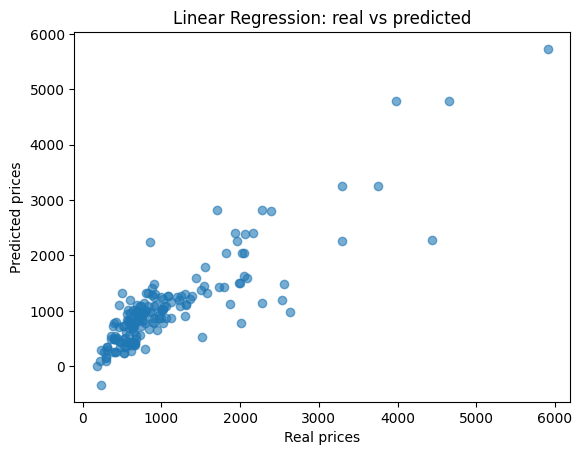

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")
plt.title("Linear Regression: real vs predicted")
plt.show()

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_lr))

0.7597975491142267


В целом для простой линейной регрессии уже неплохо

## Полиноминальная с регрессией

In [21]:
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]

# увеличим количество признаков
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X)

# разбиваем
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=22)

# масштабируем - fit только на X_train чтобы утечка данных не произошла
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Начем с RidgeCV

In [22]:
from sklearn.linear_model import RidgeCV

In [23]:
alphas = np.logspace(-2, 3, 30)

In [24]:
ridgecv_model = RidgeCV(alphas=alphas, cv=5, scoring = 'neg_mean_squared_error')
ridgecv_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03]),
        cv=5, scoring='neg_mean_squared_error')

In [25]:
ridgecv_model.coef_

array([ -4.3804112 ,  39.00906988,   3.23703943,  26.14679697,
        49.83558321,  -6.56609686,  -5.64228336,  20.61202602,
         4.282553  ,  10.2493799 ,   8.28310533, -21.51251134,
       101.77066999,  52.80047292,  55.58226224,  83.53588536,
        48.94543086,  16.4799107 ,  38.2760027 ,  58.27420103,
         9.11922645,  -9.68877512,  28.07895199,   8.15143487,
        46.64154435,  25.91923024,  13.2343457 ])

In [26]:
ridgecv_model.alpha_

np.float64(137.3823795883264)

In [27]:
np.sqrt(abs(ridgecv_model.best_score_))

np.float64(396.10522198436735)

In [28]:
y_pred_ridgeCV = ridgecv_model.predict(X_test)

In [29]:
MSE = mean_squared_error(y_test, y_pred_ridgeCV)
RMSE = np.sqrt(MSE)
RMSE

np.float64(479.30179010994806)

In [30]:
r2_score(y_test, y_pred_ridgeCV)

0.678315278202009

Полиномы не нужны

## Корреляция между признаками чтобы понять начинать с lasso или ridge

                   Price    Rating  Warranty_years  Ram_numeric  Diagonal  \
Price           1.000000  0.402115        0.230642     0.779448  0.254584   
Rating          0.402115  1.000000        0.207238     0.373024  0.232988   
Warranty_years  0.230642  0.207238        1.000000     0.236485  0.030393   
Ram_numeric     0.779448  0.373024        0.236485     1.000000  0.214661   
Diagonal        0.254584  0.232988        0.030393     0.214661  1.000000   
SSD_value       0.669425  0.332176        0.228560     0.659186  0.247666   
CPU_cores       0.726266  0.423681        0.200992     0.646983  0.191250   
CPU_threads     0.697083  0.540019        0.222442     0.659699  0.281271   

                SSD_value  CPU_cores  CPU_threads  
Price            0.669425   0.726266     0.697083  
Rating           0.332176   0.423681     0.540019  
Warranty_years   0.228560   0.200992     0.222442  
Ram_numeric      0.659186   0.646983     0.659699  
Diagonal         0.247666   0.191250     0.281

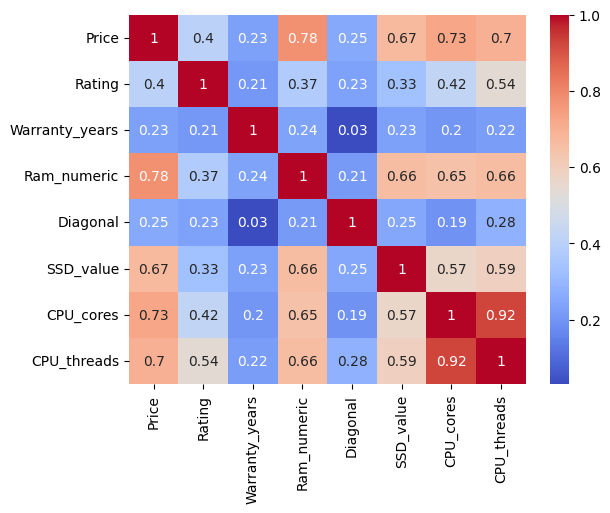

In [31]:
# df — твой DataFrame с 6 признаками
corr = df.corr(numeric_only=True)  # корреляция Пирсона
print(corr)

# Визуализация
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Признаки с высокой корреляцией (|r| > 0.7 примерно):

		CPU_cores ↔ CPU_threads = 0.924 → очень сильная корреляция
		Price ↔ CPU_cores = 0.726
		Price ↔ CPU_threads = 0.697
		Price ↔ Ram_numeric = 0.779


Признаки с низкой корреляцией

	Warranty_years ↔ остальные признаки ~ 0.2 → почти не коррелируют
	Diagonal ↔ большинство признаков < 0.3 → независимые

  Эти признаки не создают проблем мультиколлинеарности. Lasso мог бы их обнулить, если α будет слишком высоким, но они не создают сильной корреляции с другими

В наборе данных признаки сильно коррелируют и не разреженные.
	•	Значит Ridge (L2) будет более подходящим на первом этапе.
	•	После грубого подбора α через RidgeCV можно уже точечно попробовать ElasticNet с небольшим l1_ratio, если захочешь добавить L1 для лёгкого отбора признаков.


## RidgeCV

In [32]:
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]


# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_test.shape

(179, 6)

In [34]:
# ridgeCV
from sklearn.linear_model import RidgeCV
ridgecv_model = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5, scoring = 'neg_mean_absolute_error')
ridgecv_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
        cv=5, scoring='neg_mean_absolute_error')

In [35]:
ridgecv_model.coef_

array([ 12.05626082, 242.17029998,  44.86781406, 123.37058087,
       166.57821118,  80.96853384])

In [36]:
ridgecv_model.alpha_

np.float64(215.44346900318823)

In [37]:
y_pred_ridgeCV = ridgecv_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred_ridgeCV))

np.float64(415.0237271066079)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_lr))

0.7597975491142267


## ElasticNetCV

In [40]:
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]


# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train.shape

(715, 6)

In [42]:
from sklearn.linear_model import ElasticNetCV
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps = 0.001, n_alphas=100, max_iter=1000000)
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [43]:
elastic_cv_model.l1_ratio_

np.float64(0.99)

In [44]:
elastic_cv_model.alpha_

np.float64(0.5684340557200509)

In [45]:
elastic_cv_pred_two = elastic_cv_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, elastic_cv_pred_two))

np.float64(413.8520966237508)

In [47]:
elastic_cv_model.coef_

array([  3.42756259, 328.3742046 ,  59.00168312, 121.03862667,
       310.21376035, -82.58109153])

	•	Warranty_years: +3.4 — почти не влияет (цена растёт слабо при увеличении гарантии).
	•	Ram_numeric: +328 — сильное влияние, рост RAM сильно увеличивает цену.
	•	Diagonal: +59 — чем больше экран, тем дороже.
	•	SSD_value: +121 — больше SSD → выше цена.
	•	CPU_cores: +310 — количество ядер — очень важный фактор.
	•	CPU_threads: −82 — отрицательный коэффициент выглядит странно (может быть связано с мультиколлинеарностью — ядра и потоки сильно коррелируют).

In [48]:
r2_score(y_test, elastic_cv_pred_two)

0.7601704722394418

## Функция cross_val_score

In [49]:
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]


# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# здесь меняла alpha на разные
from sklearn.linear_model import Ridge
model = Ridge(alpha=100)

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [52]:
scores

array([-169864.0849793 , -224616.01839856, -162985.54099702,
       -223357.01888747,  -92743.26838738])

In [53]:
np.sqrt(abs(scores.mean())) # итоговый результат меодели Ridge(alpha=100)

np.float64(417.98706478783043)

In [54]:
model = Ridge(alpha=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [55]:
np.sqrt(abs(scores.mean()))

np.float64(412.6182886258779)

In [56]:
model = Ridge(alpha=215)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [57]:
np.sqrt(abs(scores.mean()))

np.float64(425.08887573161246)

In [58]:
model = Ridge(alpha=0.56)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [59]:
np.sqrt(abs(scores.mean()))

np.float64(412.634410237374)

Результат получился чуть хуже чем ранее без кросс-валидации, но зато более объективные результаты для реальной модели

На деле мы получили просто результаты scoree, но необучили модели.

Задача cross-val-score не обучить модель, а посмотреть как она будет вести себя на разных данные. Посмотрели - оценили - теперь можно обучать.

Поэтому сейчас обучаем

In [60]:
model.fit(X_train, y_train)

Ridge(alpha=0.56)

In [61]:
pred_cross_val = model.predict(X_test)

In [62]:
np.sqrt(mean_squared_error(y_test, pred_cross_val))

np.float64(414.1211359957149)

## Графики сравнений

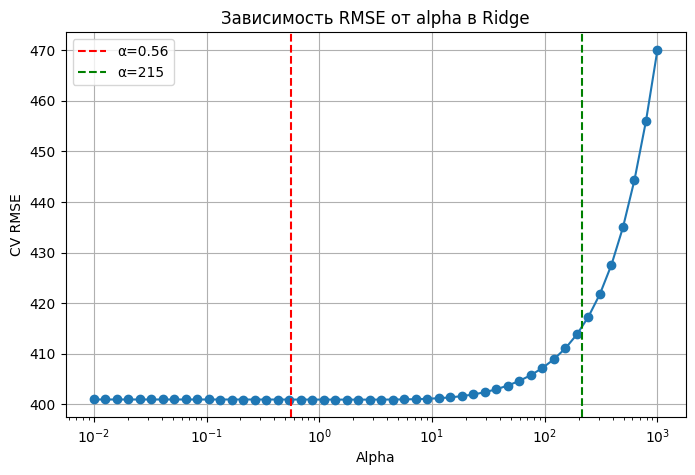

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Предположим, что X_train, y_train уже стандартизированы
alphas = np.logspace(-2, 3, 50)  # пробуем α от 0.01 до 1000
rmse_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=22)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    rmse_scores.append(np.mean(fold_rmse))

# Рисуем график
plt.figure(figsize=(8,5))
plt.semilogx(alphas, rmse_scores, marker='o')
plt.axvline(x=0.56, color='r', linestyle='--', label='α=0.56')
plt.axvline(x=215, color='g', linestyle='--', label='α=215')
plt.xlabel("Alpha")
plt.ylabel("CV RMSE")
plt.title("Зависимость RMSE от alpha в Ridge")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
model = Ridge(alpha=505)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [65]:
np.sqrt(abs(scores.mean()))

np.float64(444.52990720588133)

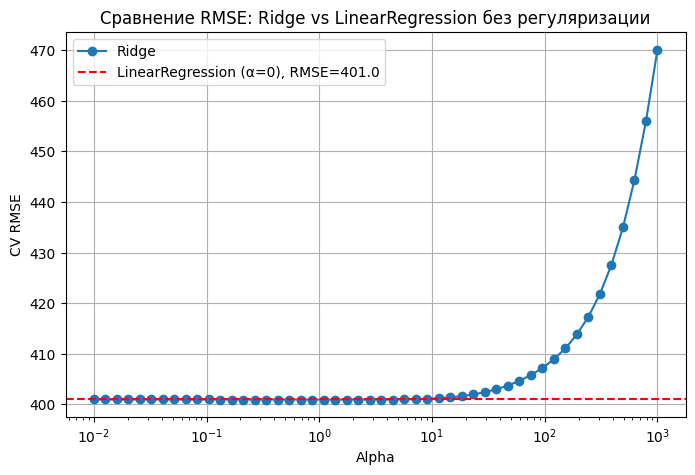

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Предположим, X_train и y_train уже стандартизированы
alphas = np.logspace(-2, 3, 50)  # α от 0.01 до 1000
rmse_ridge = []
rmse_lr = []

kf = KFold(n_splits=5, shuffle=True, random_state=22)

# RMSE для Ridge при разных α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    rmse_ridge.append(np.mean(fold_rmse))

# RMSE для обычной линейной регрессии (α=0)
lr = LinearRegression()
fold_rmse = []
for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    lr.fit(X_tr, y_tr)
    y_pred = lr.predict(X_val)
    fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
rmse_lr = np.mean(fold_rmse)

# Рисуем график
plt.figure(figsize=(8,5))
plt.semilogx(alphas, rmse_ridge, marker='o', label='Ridge')
plt.axhline(y=rmse_lr, color='r', linestyle='--', label=f'LinearRegression (α=0), RMSE={rmse_lr:.1f}')
plt.xlabel("Alpha")
plt.ylabel("CV RMSE")
plt.title("Сравнение RMSE: Ridge vs LinearRegression без регуляризации")
plt.legend()
plt.grid(True)
plt.show()

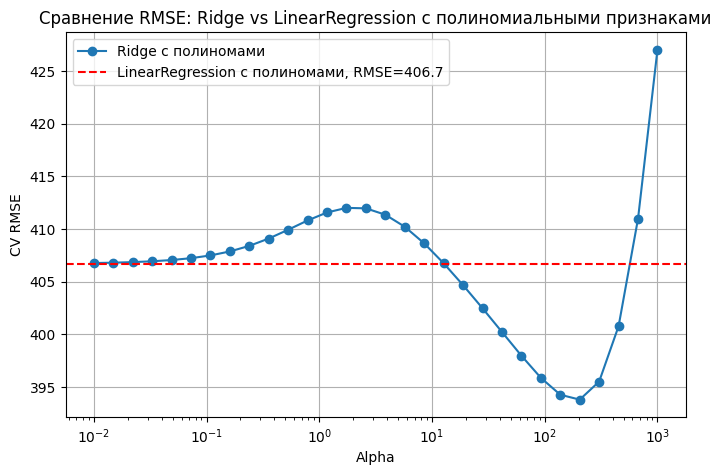

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Степень полинома
degree = 2

# Создаём полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Масштабируем
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Диапазон alpha для Ridge
alphas = np.logspace(-2, 3, 30)

rmse_ridge = []
kf = KFold(n_splits=5, shuffle=True, random_state=22)

# RMSE для Ridge с разными alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_poly_scaled):
        X_tr, X_val = X_poly_scaled[train_idx], X_poly_scaled[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_val)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    rmse_ridge.append(np.mean(fold_rmse))

# RMSE для обычной линейной регрессии с полиномами
lr = LinearRegression()
fold_rmse = []
for train_idx, val_idx in kf.split(X_poly_scaled):
    X_tr, X_val = X_poly_scaled[train_idx], X_poly_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    lr.fit(X_tr, y_tr)
    y_pred = lr.predict(X_val)
    fold_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
rmse_lr = np.mean(fold_rmse)

# Строим график
plt.figure(figsize=(8,5))
plt.semilogx(alphas, rmse_ridge, marker='o', label='Ridge с полиномами')
plt.axhline(y=rmse_lr, color='r', linestyle='--', label=f'LinearRegression с полиномами, RMSE={rmse_lr:.1f}')
plt.xlabel("Alpha")
plt.ylabel("CV RMSE")
plt.title("Сравнение RMSE: Ridge vs LinearRegression с полиномиальными признаками")
plt.legend()
plt.grid(True)
plt.show()

## GridSearch

In [68]:
# as always
y = df['Price']
X = df[['Warranty_years', 'Ram_numeric', 'Diagonal', 'SSD_value', 'CPU_cores', 'CPU_threads']]


# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import ElasticNet

In [70]:
base_elastic_net_model = ElasticNet()

In [71]:
# создаем словарь по которому будет проходить GridSearch и проверять гиперпараметры
alphas = np.logspace(-2, 3, 30)
param_grid = {'alpha':alphas,
              'l1_ratio':[.1,.5,.7, .95, .99, 1]}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
grid_model = GridSearchCV(estimator = base_elastic_net_model,
                          param_grid=param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5,
                          verbose=0)

In [74]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [75]:
grid_model.best_estimator_

ElasticNet(alpha=np.float64(0.01), l1_ratio=0.1)

о как

In [76]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002260,0.001081,0.000948,0.000092,0.01,0.10,"{'alpha': 0.01, 'l1_ratio': 0.1}",-170925.977385,-197117.045595,-168263.311525,-214907.511603,-99815.476133,-170205.864448,39195.784903,1
1,0.001927,0.000297,0.001201,0.000363,0.01,0.50,"{'alpha': 0.01, 'l1_ratio': 0.5}",-171178.448431,-196263.261916,-168868.438960,-214426.449707,-100347.348078,-170216.789418,38774.719761,6
2,0.001647,0.000107,0.000887,0.000018,0.01,0.70,"{'alpha': 0.01, 'l1_ratio': 0.7}",-171327.155998,-195836.009896,-169206.951709,-214171.991336,-100638.601738,-170236.142136,38553.285847,12
3,0.001753,0.000118,0.000917,0.000037,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-171538.375253,-195303.575917,-169669.182083,-213840.970258,-101030.074159,-170276.435534,38265.509937,26
4,0.001981,0.000337,0.001082,0.000295,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-171575.081950,-195218.646376,-169747.538421,-213786.406770,-101095.785899,-170284.691883,38218.214601,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.001930,0.000040,0.001188,0.000033,1000.00,0.50,"{'alpha': 1000.0, 'l1_ratio': 0.5}",-478854.675376,-791752.127816,-493104.379332,-606538.829750,-312900.341394,-536630.070734,158279.482251,173
176,0.001970,0.000075,0.001206,0.000033,1000.00,0.70,"{'alpha': 1000.0, 'l1_ratio': 0.7}",-479088.502252,-791764.337186,-493311.151239,-606693.368560,-313200.565397,-536811.584927,158183.753672,174
177,0.001942,0.000039,0.001194,0.000036,1000.00,0.95,"{'alpha': 1000.0, 'l1_ratio': 0.95}",-479088.502252,-791764.337186,-493311.151239,-606693.368560,-313200.565397,-536811.584927,158183.753672,174
178,0.001919,0.000025,0.001235,0.000082,1000.00,0.99,"{'alpha': 1000.0, 'l1_ratio': 0.99}",-479088.502252,-791764.337186,-493311.151239,-606693.368560,-313200.565397,-536811.584927,158183.753672,174


In [77]:
y_pred = grid_model.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(413.6757141895688)

In [79]:
mean_absolute_error(y_test, y_pred)

273.37338099805487

In [80]:
print(r2_score(y_test, y_pred))

0.7603748578245937


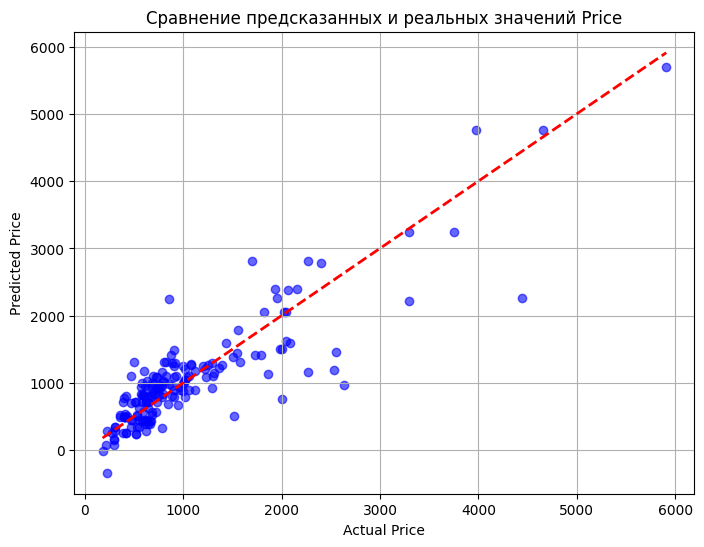

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Сравнение предсказанных и реальных значений Price")
plt.grid(True)
plt.show()